<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Proaño Rhon, Leonardo Francisco**

**22-02-2022**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [45]:
%reload_ext autoreload
%autoreload 2
import importlib
import miningscience
importlib.reload(miningscience)
# Escriba aquí su código para el ejercicio 1
import miningscience as msc

print("Descripción de la funcion download_pubmed:")
help(msc.download_pubmed)

print("Descripción de la funcion mining_pubs:")
help(msc.mining_pubs)

Descripción de la funcion download_pubmed:
Help on function download_pubmed in module miningscience:

download_pubmed(keyword: str)
    Función que permite descargar los ids de PubMed utilizando ENTREZ de Biopython.
    El parámtero es la keyword es el término de búsqueda.

Descripción de la funcion mining_pubs:
Help on function mining_pubs in module miningscience:

mining_pubs(tipo: str) -> pandas.core.frame.DataFrame
    Según el parámetro tipo, se descargan los ids de PubMed de la búsqueda:
        Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un dataframe con el PMID y el DP_year.
        Si el tipo es "AU" recupera el número de autores por PMID. El retorno es un dataframe con el PMID y el num_auth.
        Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un dataframe con el country y el num_auth.




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador proteomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [46]:
# Ahora escribimos el código para llamar a download_pubmed para descargar la data de Ecuador genomics
records = msc.download_pubmed("Ecuador genomics")
records_count = records["Count"]
first_element_id = records["IdList"][0]
print(f"El número de artículos es: {records_count}") # corresponde al número de artículos recuperados

print(f"El PMID del primer artículo es: {first_element_id}") # corresponde al ID del artículo en PUDMED

El número de artículos es: 193
El PMID del primer artículo es: 35121084


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [47]:
#Para el ejercicio 3 se utilizó la función mining_pubs para crear dataframes de pub_year, pub_authors y countries
print("Dataframe de articulos con año:")
df_pub_year = msc.mining_pubs("DP")
print(df_pub_year.head(2))
print(df_pub_year.tail(2))
print('-------------------------------------------')


print("\nDataframe de articulos con autores:")
df_pub_authors = msc.mining_pubs("AU")
print(df_pub_authors.head(2))
print(df_pub_authors.tail(2))
print('-------------------------------------------')


print("\nDataframe de número de articulos por pais:")
df_countries = msc.mining_pubs("AD")
print(df_countries.head(2))
print(df_countries.tail(2))

Dataframe de articulos con año:
       PMID  DP_year
0  35121084     2022
1  35120121     2022
         PMID  DP_year
191  17187350     2007
192   8661097     1996
-------------------------------------------

Dataframe de articulos con autores:
       PMID  num_auth
0  35121084        12
1  35120121        14
         PMID  num_auth
189  19177531         7
190  19018989         1
-------------------------------------------

Dataframe de número de articulos por pais:
         country  num_auth
0  United States        12
1  United States        14
           country  num_auth
190        England         1
191  United States         9


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


DP_year    2019.0
dtype: float64


Text(-3.74922, 40.463667, 'Spain')

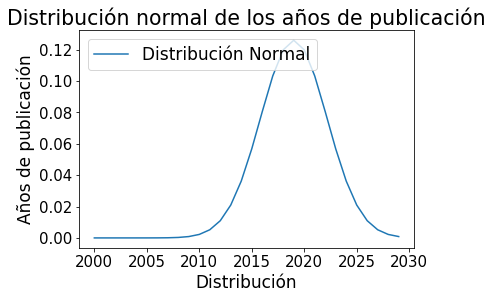

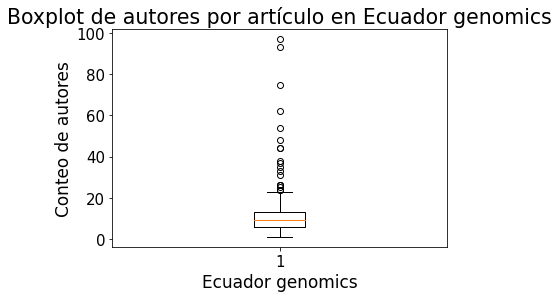

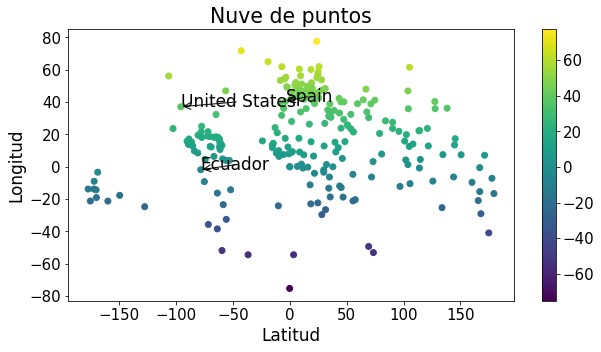

In [48]:
# En el ejercicio 4 se presenta el siguiente código
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# df_pub_year
pub_year_median = df_pub_year.median(numeric_only=True)
pub_year_standar_deviation = df_pub_year.std(numeric_only=True)


x_axis = np.arange(2000, 2030, 1)

fig1, ax1 = plt.subplots()

label = "Distribución Normal"
print(pub_year_median)
ax1.plot(x_axis, norm.pdf(x_axis, pub_year_median[0], pub_year_standar_deviation[0]), label=label)
ax1.set_title("Distribución normal de los años de publicación")
ax1.set_xlabel("Distribución")
ax1.set_ylabel("Años de publicación")
ax1.legend(loc = "upper left")




# df_pub_authors

df_pub_authors.drop(df_pub_authors[df_pub_authors['num_auth'] > 100].index, inplace=True) # Normalizamos los datos
df_pub_authors.sort_values(by="num_auth", ascending=False, inplace=True) # Ordenamos

fig2, ax2 = plt.subplots()

ax2.boxplot(df_pub_authors["num_auth"])
plt.title('Boxplot de autores por artículo en Ecuador genomics')
plt.xlabel('Ecuador genomics')
plt.ylabel('Conteo de autores')





# df_countries

# Leelos la latitud y longitud de los paises
countries_lat_lon = pd.read_csv('./data/countries.csv', engine='python', skipfooter=3)

countries_lat_lon['name'] = countries_lat_lon['name'].str.lower()
countries_lat_lon = countries_lat_lon.rename(columns={'name': 'country_name'})

#countries_lat_lon = countries_lat_lon[countries_lat_lon["name"].isin(df_countries["country"].to_list())]


df_countries['country'] = df_countries['country'].str.lower()

df_countries = df_countries.rename(columns={'country': 'country_name'})

joined_data = pd.concat([df_countries, countries_lat_lon]).groupby(['country_name']).sum()

joined_data = joined_data[joined_data['num_auth'].notna()]


plt.figure(figsize=(10,5))
plt.title('Nuve de puntos')
plt.xlabel('Latitud')
plt.ylabel('Longitud')


plt.scatter(joined_data['longitude'], joined_data['latitude'], c=joined_data['latitude'], marker='o', label='Puntos')
plt.colorbar()

plt.annotate('Ecuador', xy= (joined_data.loc['ecuador']['longitude'], joined_data.loc['ecuador']['latitude']), arrowprops={'arrowstyle': '->'})
plt.annotate('United States', xy= (joined_data.loc['united states']['longitude'], joined_data.loc['united states']['latitude']), arrowprops={'arrowstyle': '->'})
plt.annotate('Spain', xy= (joined_data.loc['spain']['longitude'], joined_data.loc['spain']['latitude']), arrowprops={'arrowstyle': '->'})

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

En los resultados del ejercicio 4

## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=./data/sequence.fasta
Alignment with 10 rows and 1269 columns
AAACAAAAGTTTTGATCCTAAACTTACCATTGTTTGAAACCAAA...CAC KP972456.1Heloderma
AAACAAAAGTTTTGATCCTAAACTTACCATTGTTTGAAACCAAA...CAC KP972455.1Heloderma
AAACAAAAGTTTTGATCCTAAACTTACCATTGTTTGAAACCAAA...CAC KP972457.1Heloderma
--------------------------------------------...--- AH005464.2Heloderma
--------------------------------------------...--- KJ917183.1Heloderma
--------------------------------------------...--- KJ917182.1Heloderma
--------------------------------------------...--- KJ917180.1Heloderma
--------------------------------------------...--- KJ917179.1Heloderma
--------------------------------------------...--- KJ917181.1Heloderma
--------------------------------------------...--- KC967646.1Heloderma
       _____ AH005464.2Heloderma
      |
      |                                                 , KJ917183.1Heloderma
      |                        _____________________

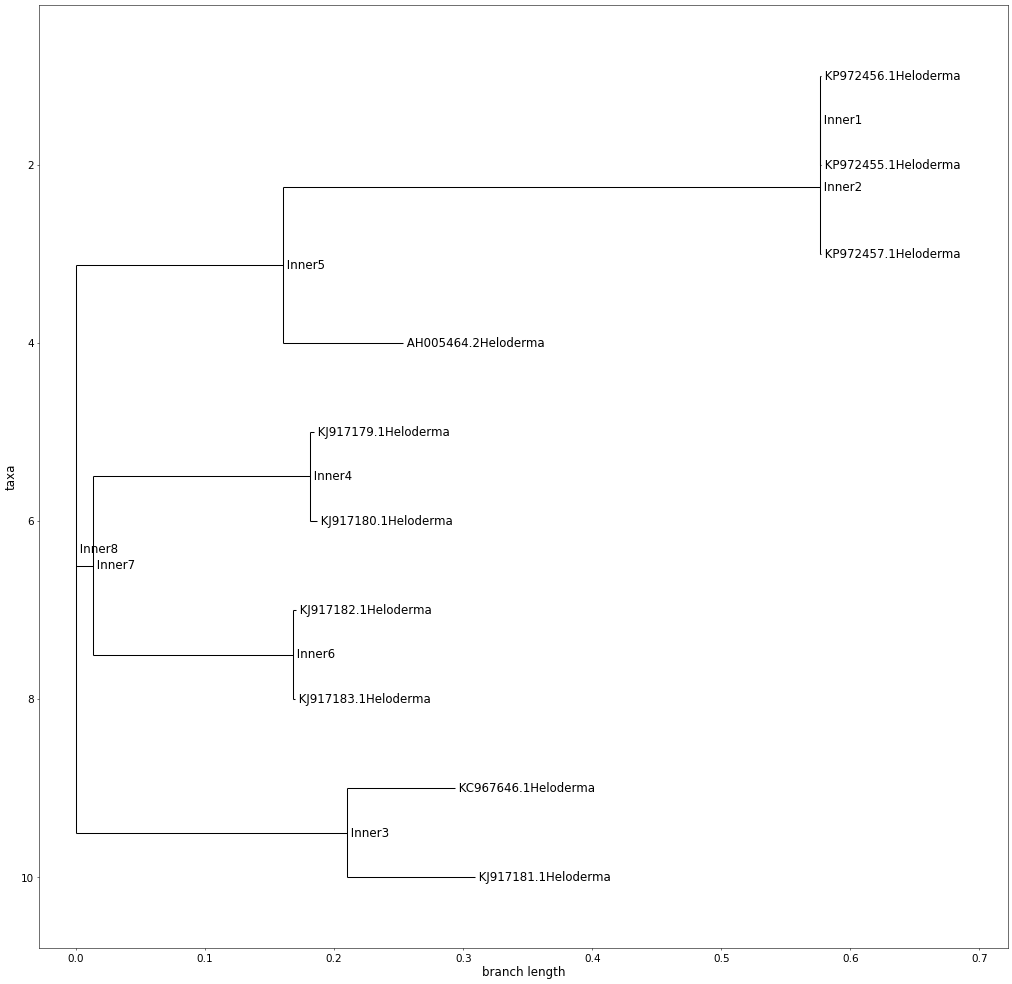

In [49]:
# Escriba aquí su código para el ejercicio 6:
import Bio
from Bio import Entrez
from Bio.Seq import Seq
from Bio import SeqIO
from IPython.core.display import Image

# Filogenia para el árbol
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO
from Bio.Align.Applications import ClustalwCommandline
import os
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets

import warnings
warnings.filterwarnings('ignore')

#Abrir los primeros IDs en el Accession List y descargar la data tipo genbank sobre Heloderma Suspectum
with open("data/sequence.seq","r") as archivo:
     listas = ["AH005464.2", "KP972457.1", "KP972456.1", "KP972455.1", "KJ917183.1", "KJ917182.1", "KJ917181.1", "KJ917180.1", "KJ917179.1", "KC967646.1"]      
Entrez.email = "leonardo.proano@est.ikiam.edu.ec"
ofile = open("./data/sequence.gb", "w")
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= listas
                  ) as handle: 
    for seq_record in SeqIO.parse(handle, "gb"):
        ofile.write(">"+str(seq_record.id)+str(seq_record.description[:50])+'\n')
        ofile.write(str(seq_record.seq)+'\n')
        ofile.write('\n')
DatosFast=open('./data/sequence.fasta','w')
with open("./data/sequence.gb",'r') as genbank: 
    a=genbank.read()
    for line in a:
        DatosFast.write(str(line))

#Cargar la data para el secuenciamiento múltiple y hacer los alineamientos por cada ID usando ClustalW2
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "./data/sequence.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)
ClustalAlign = AlignIO.read("data/sequence.aln", "clustal")
print(ClustalAlign)

#Generar Dendograma (Árbol filogenético)
tree = Phylo.read("data/sequence.dnd", "newick")
Phylo.draw_ascii(tree)

#Cargar el alineamiento 
with open("data/sequence.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

#Iniciar la calculadora de Distancias en el modelo
calculator = DistanceCalculator('identity')

#Matriz de Distancias 
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

#Función para usar el constructor del árbol filogenético
constructor = DistanceTreeConstructor(calculator)

#Construir el Árbol filogenético
arbolF= constructor.build_tree(alignment)
arbolF.rooted = True
print(arbolF)

#Crear archivo .xml del árbol filogenético 
Phylo.write(arbolF, "./data/arbolF.xml", "phyloxml")
arbolFg = Phylo.read(file="./data/arbolF.xml", format= "phyloxml")


#Make a better looking tree using the features of matplotlib 

fig = plt.figure(figsize=(25, 25), dpi=50) # create figure & set the size 
matplotlib.rc('font', size=17)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=15)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=15)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(arbolFg, axes=axes)
fig.savefig("data/arbolFgclando")

Para interpretar el árbol filogenético sobre el monstruo de Gila (Heloderma Suspectum) debemos analizar los inner, donde son la muestra de una especiación para diferentes variaciones genéticas. En los primeros inners muestra una especie pero con una descendencia de 3 variaciones génicas. Por otro lado, existen ramificaciones que han sufrido variaciones más tempranas que otra especie, esto suele suceder cuando ocurren eventos naturales o provocados por el hombre y genera la variación en la especie, esto se muestra en las variaciones KC y KJ. Finalmente un caso en particular es la variación AH, donde no tuvo más variaciones, es posible que no haya contacto con esta especie y eso no permite que se logre identificar más variaciones génicas. 

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```